<ipython-input-30-783c92dbe9ac>:50: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)
<ipython-input-30-783c92dbe9ac>:47: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

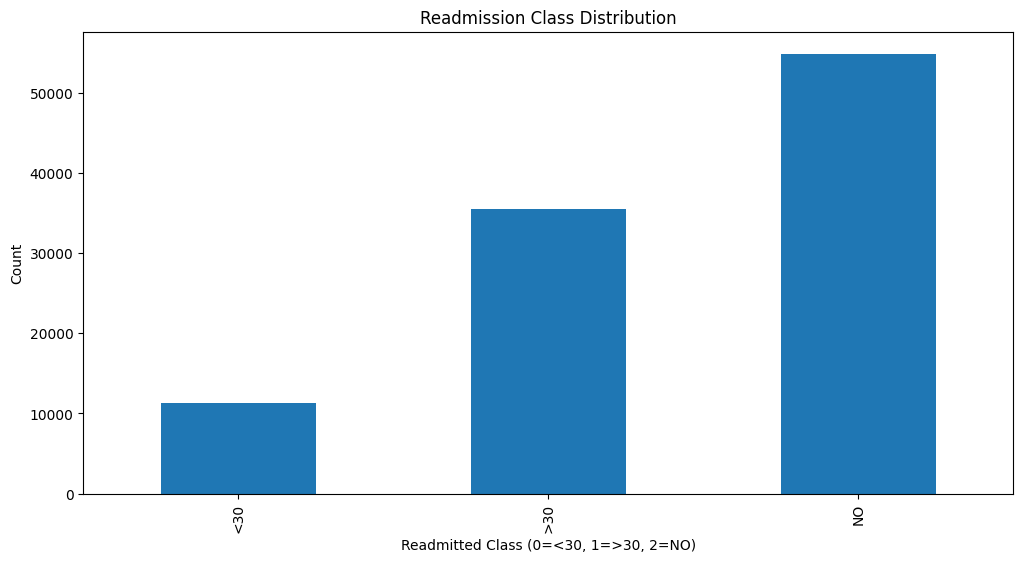

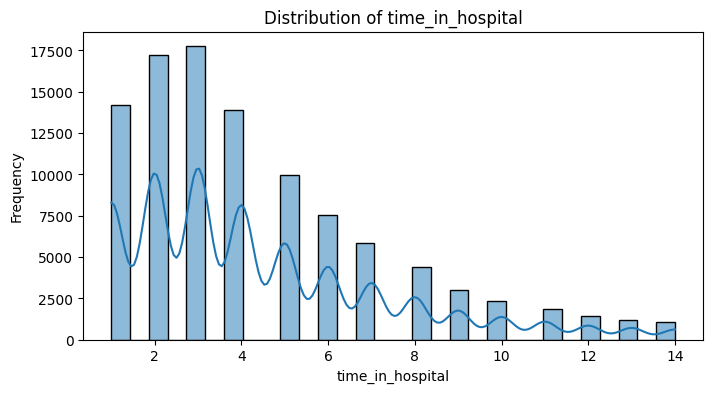

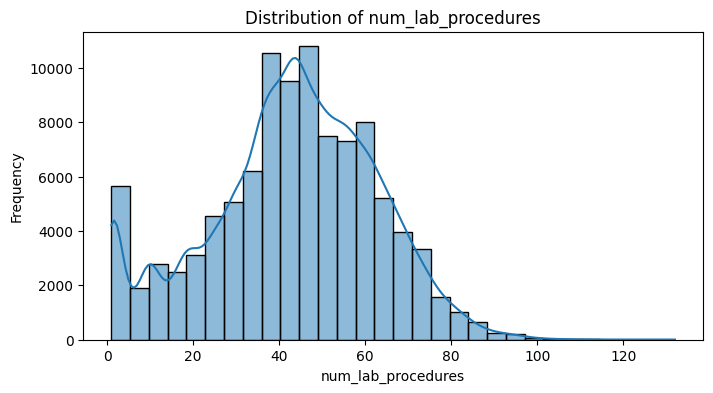

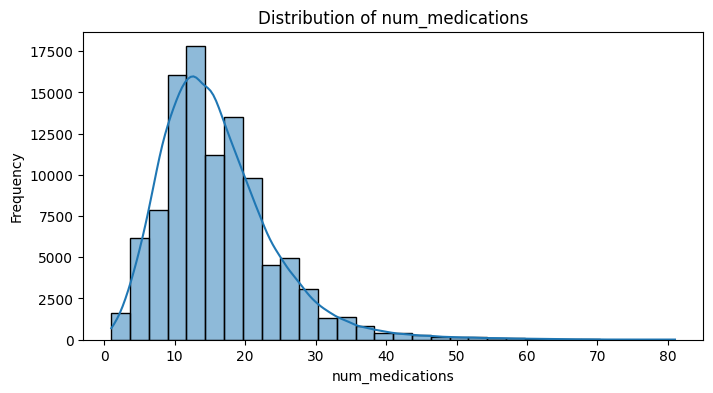

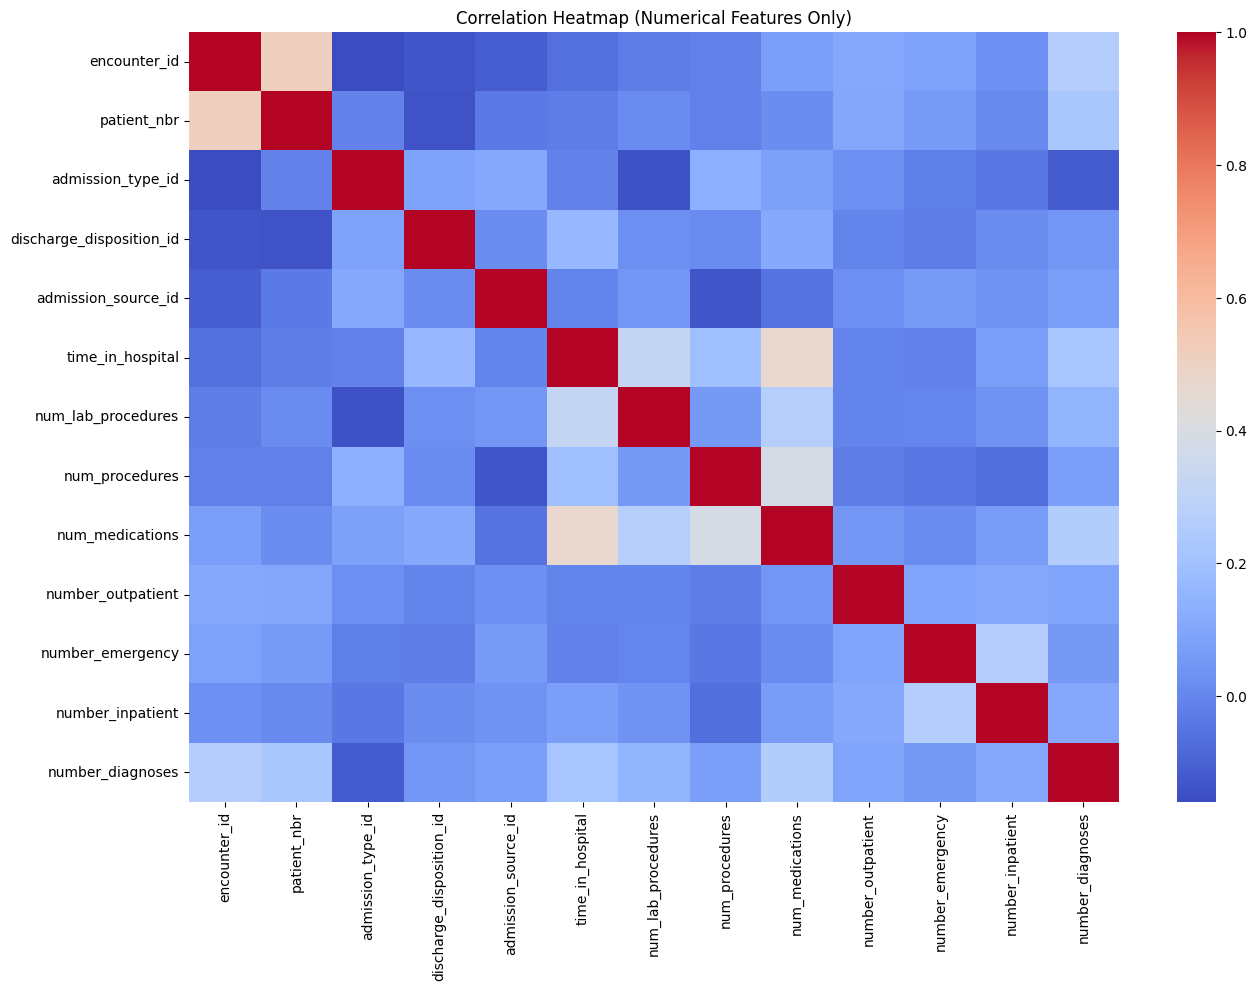

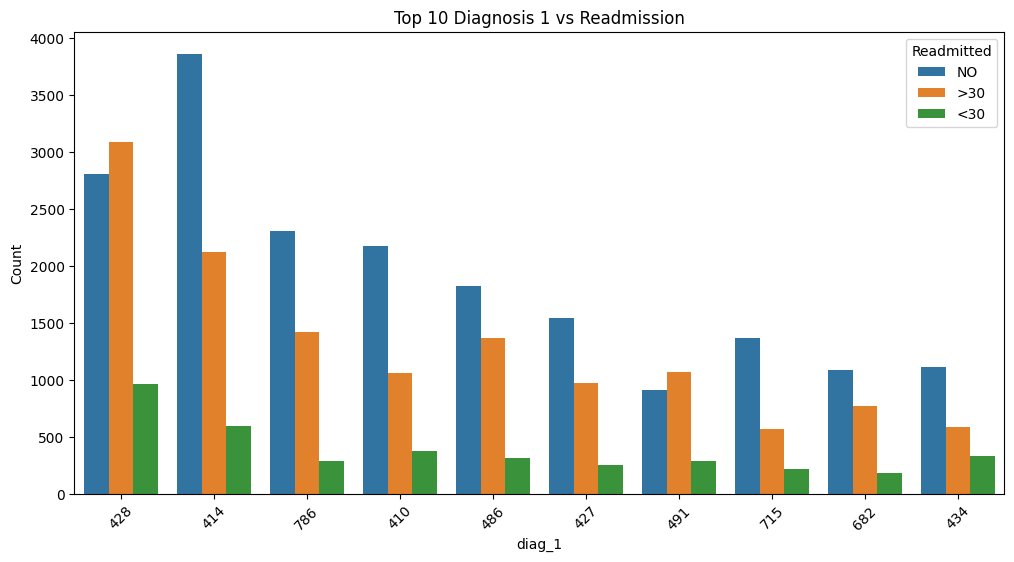

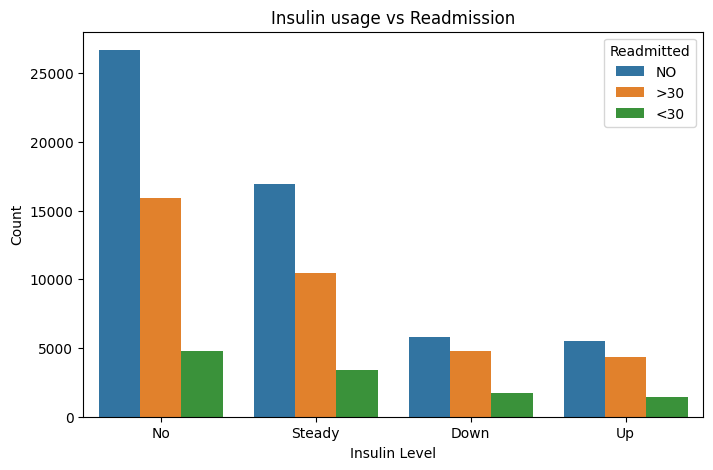

Logistic Regression
Accuracy: 0.9118086696562033
Logistic Regression ROC_AUC Score: 0.6038
Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95      1220
           1       0.00      0.00      0.00       118

    accuracy                           0.91      1338
   macro avg       0.46      0.50      0.48      1338
weighted avg       0.83      0.91      0.87      1338



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


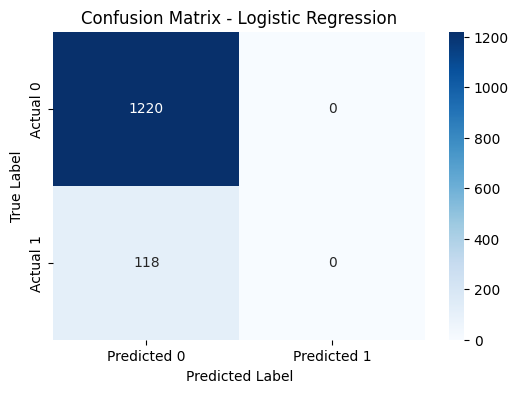

Random Forest
Accuracy: 0.8759342301943199
Random Forest ROC_AUC Score: 0.5378
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93      1220
           1       0.14      0.08      0.10       118

    accuracy                           0.88      1338
   macro avg       0.53      0.51      0.52      1338
weighted avg       0.85      0.88      0.86      1338



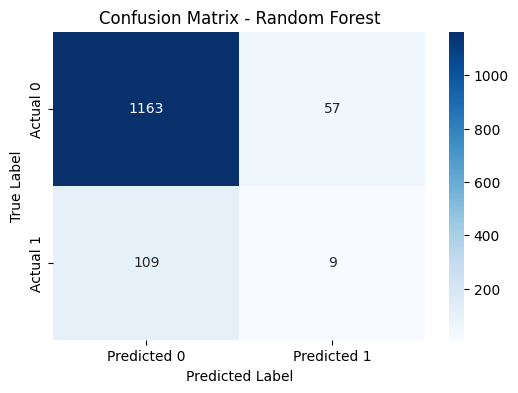

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:34:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost
Accuracy: 0.9125560538116592
XGBoost ROC_AUC Score: 0.5546
Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95      1220
           1       1.00      0.01      0.02       118

    accuracy                           0.91      1338
   macro avg       0.96      0.50      0.49      1338
weighted avg       0.92      0.91      0.87      1338



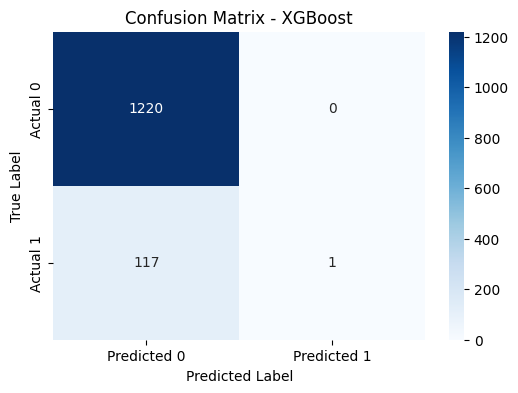

Decision Tree
Accuracy : 0.8303437967115097
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.91      1220
           1       0.10      0.11      0.10       118

    accuracy                           0.83      1338
   macro avg       0.50      0.51      0.50      1338
weighted avg       0.84      0.83      0.84      1338



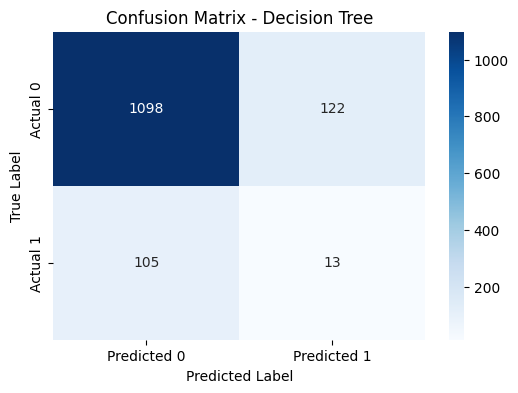

Support Vector Machine
Accuracy: 0.9118086696562033
Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95      1220
           1       0.00      0.00      0.00       118

    accuracy                           0.91      1338
   macro avg       0.46      0.50      0.48      1338
weighted avg       0.83      0.91      0.87      1338



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


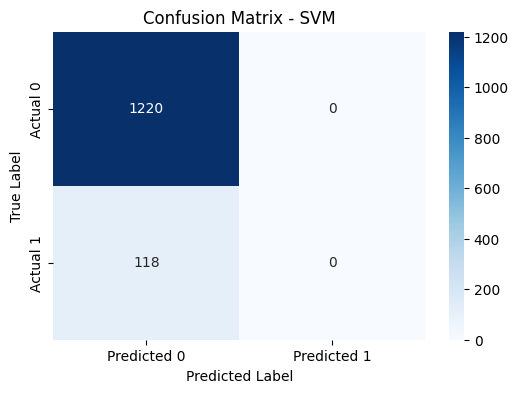

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC

data = pd.read_csv('diabetic_data.csv')
mapping = pd.read_csv('IDs_mapping.csv')



from sklearn.preprocessing import LabelEncoder

def preprocess_data(data, mapping):
    data['admission_type_id'] = data['admission_type_id'].astype(str)
    data['discharge_disposition_id'] = data['discharge_disposition_id'].astype(str)
    data['admission_source_id'] = data['admission_source_id'].astype(str)

    id_columns = {
        'admission_type_id': (0, 9),
        'discharge_disposition_id': (10, 42),
        'admission_source_id': (42, 67),
    }

#Mapping
    for col, (start, end) in id_columns.items():
        subset = mapping.iloc[start:end].copy()
        subset['admission_type_id'] = subset['admission_type_id'].astype(str)
        map_dict = dict(zip(subset['admission_type_id'], subset['description']))
        data[col] = data[col].map(map_dict)

#Handling missing values
    data.drop(['citoglipton', 'examide'], axis=1, inplace=True)
    data.drop(['payer_code', 'medical_specialty', 'weight', 'max_glu_serum', 'A1Cresult'], axis=1, inplace=True)

    invalid_values = ['?', 'Not Available', 'Not Mapped', 'Other', 'Unknown/Invalid']
    for col in data.columns:
        if data[col].dtype == 'object':
            data[col].replace(invalid_values, np.nan, inplace=True)
            data[col].fillna(data[col].mode()[0], inplace=True)
        else:
            data[col].fillna(data[col].mean(), inplace=True)
#Encoding
    cat_cols = data.select_dtypes(include='object').columns
    for col in cat_cols:
        data[col] = LabelEncoder().fit_transform(data[col].astype(str))

#Handling outliers
    num_cols = data.select_dtypes(include=['int64', 'float64']).columns
    for col in num_cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
#Normalization
    for col in data.columns:
        if pd.api.types.is_numeric_dtype(data[col]):
            min_val = data[col].min()
            max_val = data[col].max()
            if max_val != min_val:
                data[col] = (data[col] - min_val) / (max_val - min_val)

    return data

processed_data = preprocess_data(data.copy(), mapping)

#Feature Distribution & Correlation

plt.figure(figsize=(12, 6))
data['readmitted'].value_counts().sort_index().plot(kind='bar')
plt.title('Readmission Class Distribution')
plt.xlabel('Readmitted Class (0=<30, 1=>30, 2=NO)')
plt.ylabel('Count')
plt.show()


for col in ['time_in_hospital', 'num_lab_procedures', 'num_medications']:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

#Correlation matrix
numeric_data = data.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(15, 10))
sns.heatmap(numeric_data.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap (Numerical Features Only)')
plt.show()

#Readmission vs Diagnoses or Medications

diag_cols = ['diag_1', 'diag_2', 'diag_3']
med_cols = ['metformin', 'insulin', 'glyburide', 'glipizide']


raw_data = pd.read_csv('diabetic_data.csv')


for col in diag_cols + med_cols:
    data[col] = raw_data[col]


plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='diag_1', hue='readmitted', order=data['diag_1'].value_counts().index[:10])
plt.title('Top 10 Diagnosis 1 vs Readmission')
plt.xlabel('diag_1')
plt.ylabel('Count')
plt.legend(title='Readmitted')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='insulin', hue='readmitted', order=data['insulin'].value_counts().index)
plt.title('Insulin usage vs Readmission')
plt.xlabel('Insulin Level')
plt.ylabel('Count')
plt.legend(title='Readmitted')
plt.show()

#splitting data
processed_data['readmitted'] = processed_data['readmitted'].apply(lambda x: 1 if x == 0 else 0)


X = processed_data.drop(['encounter_id', 'patient_nbr', 'readmitted'], axis=1)
y = processed_data['readmitted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# ----------- Logistic Regression -----------
logistic_model = LogisticRegression(solver='liblinear', C=10, random_state=0 )
logistic_model.fit(X_train, y_train)
y_pred_log = logistic_model.predict(X_test)
y_prob_log = logistic_model.predict_proba(X_test)[:, 1]
roc_auc_log = roc_auc_score(y_test, y_prob_log)

print("="*60)
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(f"Logistic Regression ROC_AUC Score: {roc_auc_log:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_log))

# ----------- Confusion Matrix for Logistic Regression -----------
cm_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ----------- Random Forest -----------
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

print("="*60)
print("Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(f"Random Forest ROC_AUC Score: {roc_auc_rf:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# ----------- Confusion Matrix for Random Forest -----------
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ----------- XGBoost -----------
xgb_model = XGBClassifier(
    learning_rate=0.1, n_estimators=100, max_depth=5,
    subsample=0.8, colsample_bytree=0.8,
    use_label_encoder=False, eval_metric='logloss', random_state=42
)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]
roc_auc_xgb = roc_auc_score(y_test, y_prob_xgb)

print("="*60)
print("XGBoost")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(f"XGBoost ROC_AUC Score: {roc_auc_xgb:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

# ----------- Confusion Matrix for XGBoost -----------
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ----------- Decision Tree -----------
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=42 )
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("="*60)
print("Decision Tree")
print("Accuracy :", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

# ----------- Confusion Matrix for Decision Tree -----------
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ----------- Support Vector Machine (SVM) -----------
svm_model = SVC(probability=True, random_state=42 ) # probability=True is needed for predict_proba
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("="*60)
print("Support Vector Machine")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

# ----------- Confusion Matrix for SVM -----------
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()